In [1]:
import pandas as pd
import numpy as np
import os as os
from IPython.display import display
from sklearn.linear_model import PoissonRegressor, TweedieRegressor, Perceptron, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error as MSE

### Load data

In [2]:
dfs_train = {}
dfs_test = {}

In [3]:
for root, directory, files in os.walk("data/train_preprocessed", topdown=False):
    if files:
        for file in files:
            dfs_train[file[:-4]] = pd.read_csv(f"{root}/{file}")
for root, directory, files in os.walk("data/test_preprocessed", topdown=False):
    if files:
        for file in files:
            dfs_test[file[:-4]] = pd.read_csv(f"{root}/{file}")
            dfs_test[file[:-4]].drop(columns=["Target", "Target_clas", "Target_regr"], inplace=True)

In [4]:
def impute_nan_values(dfs):
    for df in dfs.values():
        for col in df.columns:
            if df[col].dtype == np.float64 or df[col].dtype == np.int64:
                df[col] = df.groupby("season")[col].transform(lambda x: x.fillna(x.mean()))
        df.dropna(inplace=True)
impute_nan_values(dfs_train)
impute_nan_values(dfs_test)

In [5]:
# validation set

dfs_valid_reg_X = {}
dfs_valid_reg_y = {}
dfs_train_reg_X = {}
dfs_train_reg_y = {}
# dfs_valid_clas_X = {}
# dfs_valid_clas_y = {}
# dfs_train_clas_X = {}
# dfs_train_clas_y = {}

dfs_train.pop('df_england')


cols_to_drop = ['FTHG', 'FTAG', 'MatchTeams', 'SameHomeTeam', 'Target', 'Target_regr', 'Target_clas']

for country in dfs_train:
    # dfs_valid_reg_y[country[3:]] = dfs_train[country][dfs_train[country]["Target_regr"] > 0]
    # dfs_valid_reg_X[country[3:]] = dfs_train[country][dfs_train[country]["Target_regr"] > 0]
    # 
    # dfs_train_reg_y[country[3:]] = dfs_train[country][dfs_train[country]["Target_regr"] > 0]
    # dfs_train_reg_X[country[3:]] = dfs_train[country][dfs_train[country]["Target_regr"] > 0]
    
    dfs_train[country]["heavy_favour"] = dfs_train[country]["Avg_home_odds"] - dfs_train[country]["Avg_away_odds"]
    dfs_test[country]["heavy_favour"] = dfs_test[country]["Avg_home_odds"] - dfs_test[country]["Avg_away_odds"]
    
    dfs_valid_reg_y[country[3:]] = dfs_train[country][dfs_train[country]["season"] == 21]["Target_regr"]
    dfs_valid_reg_X[country[3:]] = dfs_train[country][dfs_train[country]["season"] == 21].drop(columns=cols_to_drop)

    dfs_train_reg_y[country[3:]] = dfs_train[country][dfs_train[country]["season"] > 5]
    dfs_train_reg_X[country[3:]] = dfs_train[country][dfs_train[country]["season"] > 5]
    
    dfs_train_reg_y[country[3:]] = dfs_train_reg_y[country[3:]][dfs_train_reg_y[country[3:]]["season"] != 21]["Target_regr"]
    dfs_train_reg_X[country[3:]] = dfs_train_reg_X[country[3:]][dfs_train_reg_X[country[3:]]["season"] != 21].drop(columns=cols_to_drop)

    # dfs_train_clas_y[country[3:]] = dfs_train[country][dfs_train[country]["season"] != 21]["Target_clas"]
    # dfs_train_clas_X[country[3:]] = dfs_train[country][dfs_train[country]["season"] != 21].drop(columns=cols_to_drop)
    # 
    # dfs_valid_clas_y[country[3:]] = dfs_train[country][dfs_train[country]["season"] == 21]["Target_clas"]
    # dfs_valid_clas_X[country[3:]] = dfs_train[country][dfs_train[country]["season"] == 21].drop(columns=cols_to_drop)

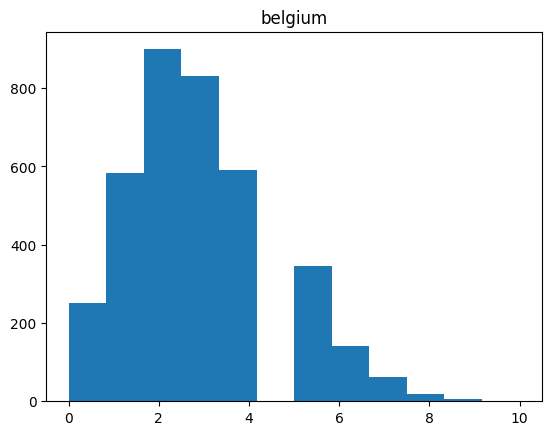

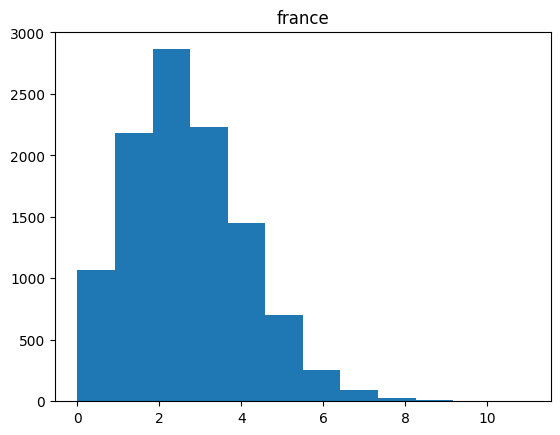

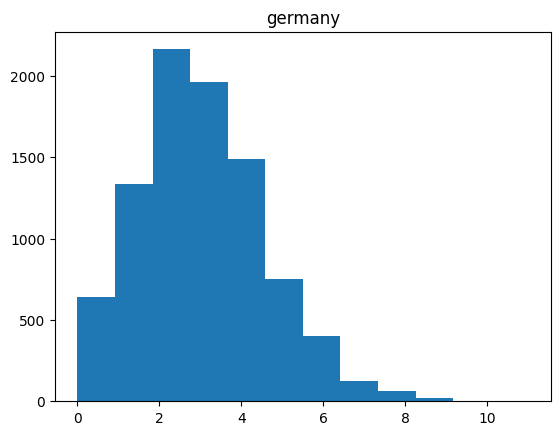

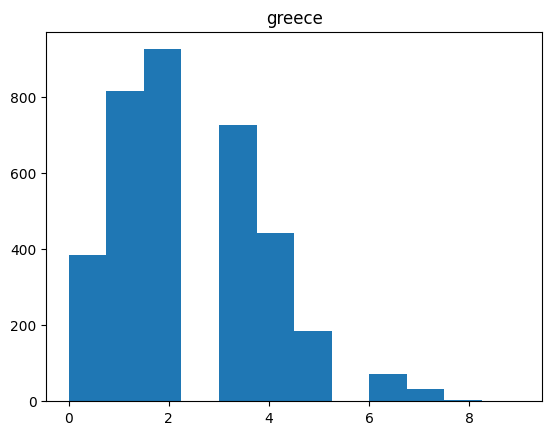

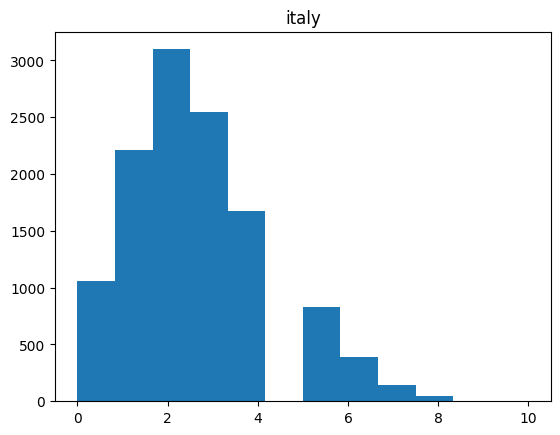

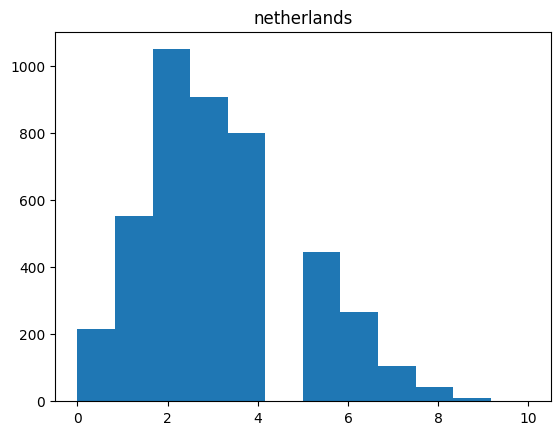

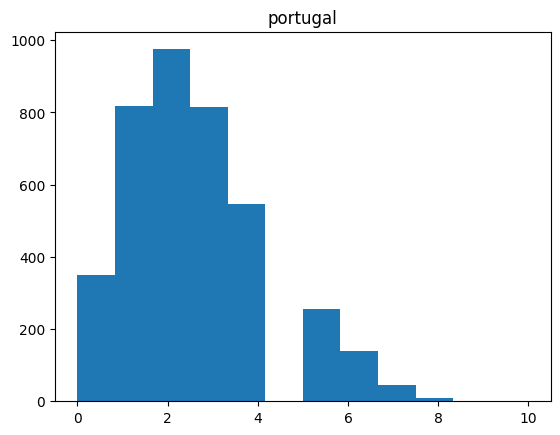

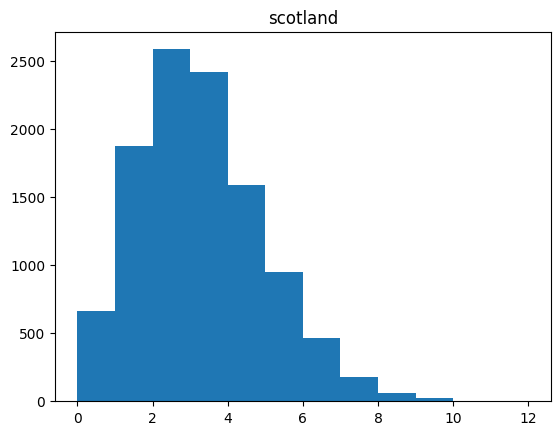

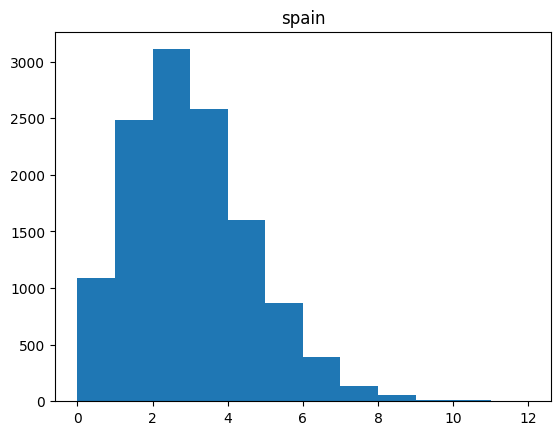

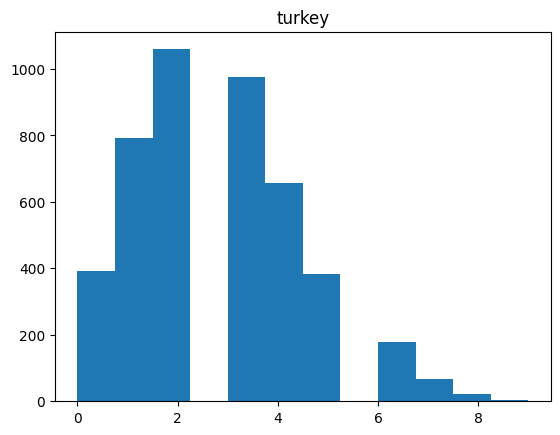

2.426353027657815

In [6]:
# obraski
import matplotlib.pyplot as plt 

a = pd.DataFrame
for country in dfs_train_reg_y:
    a = dfs_train_reg_y[country].value_counts()
    plt.hist(x=dfs_train_reg_y[country], bins=12)
    plt.title(country)
    plt.show()


dfs_train_reg_y['france'].mean()

### Regression task


baseline model


In [7]:
bl_forests = {}
p_regressors = {}
# tw_forests = {}
# perceptrons = {}
log_regressors = {}
class_forests = {}
ada_regressors = {}
bag_regressors = {}
grad_regressors = {}

In [8]:
for country in dfs_train_reg_X:
    bl_forests[country] = RandomForestRegressor(n_estimators=186, criterion="squared_error", max_depth=10)
    p_regressors[country] = PoissonRegressor(max_iter=100, solver='newton-cholesky')
    # tw_forests[country] = TweedieRegressor(power=3, solver='newton-cholesky')
    # perceptrons[country] = Perceptron()
    log_regressors[country] = LogisticRegression(solver='newton-cholesky', random_state=42)
    class_forests[country] = RandomForestClassifier(n_estimators=186, max_depth=10)
    ada_regressors[country] = AdaBoostRegressor(loss='square', random_state=42)
    bag_regressors[country] = BaggingRegressor(bootstrap=False, random_state=42)
    grad_regressors[country] = GradientBoostingRegressor(random_state=42)

In [9]:
for country in bl_forests:
    try:
        dfs_valid_reg_X[country].drop(columns=['Avg_bookie_prediction'], axis=1, inplace=True)
        dfs_train_reg_X[country].drop(columns=['Avg_bookie_prediction'], axis=1, inplace=True)
    except:
        print("hmm")

hmm


In [10]:
# dfs_train_reg_X['england'].head()


In [11]:
for country in bl_forests:
    print("fitting ", country)
    bl_forests[country].fit(X=dfs_train_reg_X[country], y=dfs_train_reg_y[country])
    p_regressors[country].fit(X=dfs_train_reg_X[country], y=dfs_train_reg_y[country])
    # tw_forests[country].fit(X=dfs_train_reg_X[country], y=dfs_train_reg_y[country])
    # perceptrons[country].fit(X=dfs_train_reg_X[country], y=dfs_train_reg_y[country])
    log_regressors[country].fit(X=dfs_train_reg_X[country], y=dfs_train_reg_y[country])
    class_forests[country].fit(X=dfs_train_reg_X[country], y=dfs_train_reg_y[country])
    ada_regressors[country].fit(X=dfs_train_reg_X[country], y=dfs_train_reg_y[country])
    bag_regressors[country].fit(X=dfs_train_reg_X[country], y=dfs_train_reg_y[country])
    grad_regressors[country].fit(X=dfs_train_reg_X[country], y=dfs_train_reg_y[country])

fitting  belgium
fitting  france
fitting  germany
fitting  greece
fitting  italy
fitting  netherlands
fitting  portugal
fitting  scotland
fitting  spain
fitting  turkey


In [12]:
for country in bl_forests:
    # print("predicting ", country)
    bl_prediction = bl_forests[country].predict(dfs_valid_reg_X[country])
    print("baseline forest mse of ", country, ":\t", MSE(bl_prediction, dfs_valid_reg_y[country]))
    pr_prediction = p_regressors[country].predict(dfs_valid_reg_X[country])
    print("poisson regressor MSE of ", country, ":\t", MSE(pr_prediction, dfs_valid_reg_y[country]))
    # tw_prediction = tw_forests[country].predict(dfs_valid_reg_X[country])
    # print("tweedie regression MSE ", country, ": ", MSE(tw_prediction, dfs_valid_reg_y[country]))
    # per_prediction = perceptrons[country].predict(dfs_valid_reg_X[country])
    # print("perceptron model mse of ", country, ":\t", MSE(per_prediction, dfs_valid_reg_y[country]))
    log_prediction = log_regressors[country].predict(dfs_valid_reg_X[country])
    print("logistic regression mse of ", country, ":\t", MSE(log_prediction, dfs_valid_reg_y[country]))
    cl_prediction = class_forests[country].predict(dfs_valid_reg_X[country])
    print("classification model mse of ", country, ":\t", MSE(cl_prediction, dfs_valid_reg_y[country]))
    ada_prediction = ada_regressors[country].predict(dfs_valid_reg_X[country])
    print("ada boost model mse of ", country, ":\t", MSE(ada_prediction, dfs_valid_reg_y[country]))
    bag_prediction = bag_regressors[country].predict(dfs_valid_reg_X[country])
    print("bagging regressor mse of ", country, ":\t", MSE(bag_prediction, dfs_valid_reg_y[country]))
    grad_prediction = grad_regressors[country].predict(dfs_valid_reg_X[country])
    print("gradient boost mse of ", country, ":\t", MSE(grad_prediction, dfs_valid_reg_y[country]))
    print("----------------------")
    print(min([MSE(bl_prediction, dfs_valid_reg_y[country]),
               MSE(pr_prediction, dfs_valid_reg_y[country]),
               # MSE(tw_prediction, dfs_valid_reg_y[country]),
               # MSE(per_prediction, dfs_valid_reg_y[country]),
               MSE(log_prediction, dfs_valid_reg_y[country]),
               MSE(cl_prediction, dfs_valid_reg_y[country]),
               MSE(ada_prediction, dfs_valid_reg_y[country]),
               MSE(bag_prediction, dfs_valid_reg_y[country]),
               MSE(grad_prediction, dfs_valid_reg_y[country])
    ]))
    print("----------------------")

baseline forest mse of  belgium :	 3.7323453753405667
poisson regressor MSE of  belgium :	 2.656771761053219
logistic regression mse of  belgium :	 2.729096989966555
classification model mse of  belgium :	 2.903010033444816
ada boost model mse of  belgium :	 3.7925006226924265
bagging regressor mse of  belgium :	 6.872307692307691
gradient boost mse of  belgium :	 4.154247540819849
----------------------
2.656771761053219
----------------------
baseline forest mse of  france :	 2.6048295677836197
poisson regressor MSE of  france :	 2.4439897972790883
logistic regression mse of  france :	 2.901217861975643
classification model mse of  france :	 2.6630581867388363
ada boost model mse of  france :	 4.17669464379704
bagging regressor mse of  france :	 9.124573748308524
gradient boost mse of  france :	 2.5687848901553716
----------------------
2.4439897972790883
----------------------
baseline forest mse of  germany :	 2.8552840484222872
poisson regressor MSE of  germany :	 2.63464989739257

random search


In [13]:
param_grid = {
    'n_estimators':[i for i in range(50,200)],
    'min_samples_split':[i for i in range(2, 50)],
    'max_depth':[i for i in range(3, 100)]
}

rs_estimators = {}
rs_forests = {}
rs_best = {}
rs_best_estims = {}

In [14]:
for country in bl_forests:
    rs_estimators[country] = RandomForestRegressor(random_state=42)

In [15]:
for country in dfs_train_reg_X:
    print("random searching", country)
    rs_forests[country] = RandomizedSearchCV(estimator=rs_estimators[country], param_distributions=param_grid,  n_iter=3, cv=3, random_state=42, error_score='raise')

random searching belgium
random searching france
random searching germany
random searching greece
random searching italy
random searching netherlands
random searching portugal
random searching scotland
random searching spain
random searching turkey


In [16]:
for country in rs_forests:
    rs_forests[country].fit(X=dfs_train_reg_X[country], y=dfs_train_reg_y[country])
    rs_best[country] = rs_forests[country].best_params_
    print("best params for country", country, ": ", rs_best[country])
    rs_best_estims[country] = rs_forests[country].best_estimator_

best params for country belgium :  {'n_estimators': 58, 'min_samples_split': 47, 'max_depth': 19}
best params for country france :  {'n_estimators': 58, 'min_samples_split': 47, 'max_depth': 19}
best params for country germany :  {'n_estimators': 58, 'min_samples_split': 47, 'max_depth': 19}
best params for country greece :  {'n_estimators': 58, 'min_samples_split': 47, 'max_depth': 19}
best params for country italy :  {'n_estimators': 132, 'min_samples_split': 17, 'max_depth': 21}
best params for country netherlands :  {'n_estimators': 58, 'min_samples_split': 47, 'max_depth': 19}
best params for country portugal :  {'n_estimators': 58, 'min_samples_split': 47, 'max_depth': 19}
best params for country scotland :  {'n_estimators': 58, 'min_samples_split': 47, 'max_depth': 19}
best params for country spain :  {'n_estimators': 58, 'min_samples_split': 47, 'max_depth': 19}
best params for country turkey :  {'n_estimators': 132, 'min_samples_split': 17, 'max_depth': 21}


In [17]:
for country in rs_forests:
    preds = rs_best_estims[country].predict(dfs_valid_reg_X[country])
    print("Validation MSE of country ", country, " with random search params: ", MSE(dfs_valid_reg_y[country], preds))

Validation MSE of country  belgium  with random search params:  3.658830398921177
Validation MSE of country  france  with random search params:  2.900288271474039
Validation MSE of country  germany  with random search params:  3.1495740380760346
Validation MSE of country  greece  with random search params:  2.719489538102821
Validation MSE of country  italy  with random search params:  2.606613931467623
Validation MSE of country  netherlands  with random search params:  2.71330173856407
Validation MSE of country  portugal  with random search params:  2.2237513450557262
Validation MSE of country  scotland  with random search params:  2.538538957622012
Validation MSE of country  spain  with random search params:  2.588335542398841
Validation MSE of country  turkey  with random search params:  3.1719231647991317


grid search


train on best params


*repeat with boosting?*

In [18]:
# gb_forests = {}

In [19]:
for country in dfs_train_reg_X:
    gb_forests[country] = HistGradientBoostingRegressor(max_depth=10)

NameError: name 'HistGradientBoostingRegressor' is not defined

In [ ]:
for country in gb_forests:
    print("fitting ", country)
    gb_forests[country].fit(X=dfs_train_reg_X[country], y=dfs_train_reg_y[country])

In [ ]:
for country in bl_forests:
    # print("predicting ", country)
    prediction = gb_forests[country].predict(dfs_valid_reg_X[country])
    print("gradient boost forest mse of ", country, ": ", MSE(prediction, dfs_valid_reg_y[country]))